In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [2]:
df = df.ffill()
df.head(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937


In [7]:
from matplotlib import rc
rc('font', family='AppleGothic')

<class 'pandas.core.series.Series'>


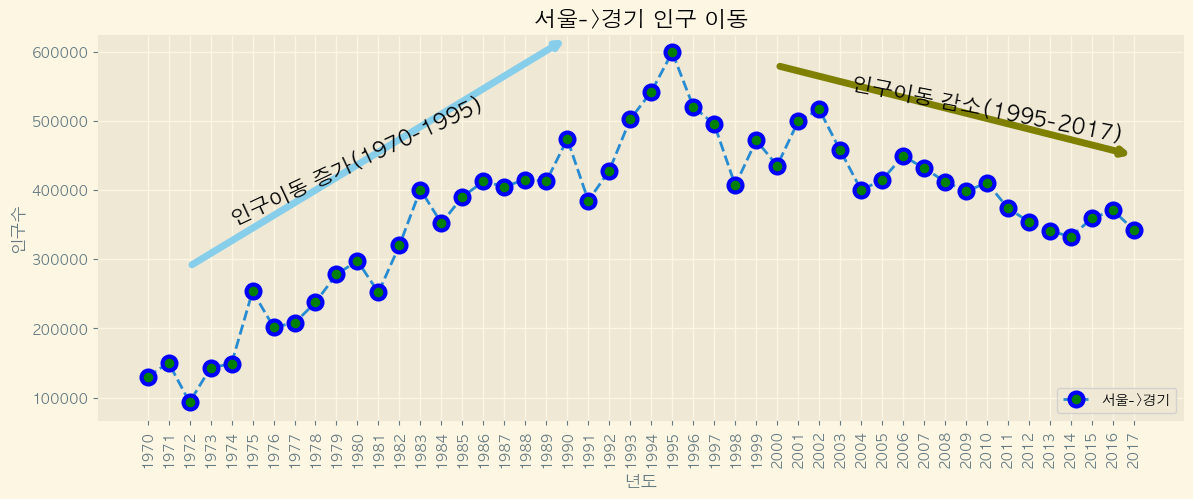

In [9]:
#서울에서 다른지역으로 이동한데이터
mask = (df['전출지별'] == '서울특별시') & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1, inplace=False)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')


# df_seoul
#서울->경기 이동한 인구데이터
sr_one = df_seoul.loc['경기도']
sr_one.head()
print(type(sr_one))

plt.style.use('Solarize_Light2')
plt.figure(figsize=(14,5))  #차트 크기지정
plt.plot(sr_one.index,#x축데이터
         sr_one.values, #y축데이터
         linestyle='--',  #선의 스타일
         marker = 'o',
         markersize = 10,
         markerfacecolor = 'green',
         markeredgecolor = 'blue',
         markeredgewidth=3,
         ) 
# plt.plot(sr_one)
plt.title('서울->경기 인구 이동') #차트의 제목
plt.xlabel('년도')  #x축 이름
plt.ylabel('인구수') #y축 이름
plt.xticks(rotation='vertical') #x축 라벨을 회전
plt.legend(labels=['서울->경기'], loc='best') #범례박스 이름, 위치

# plt.plot(sr_one)
plt.title('서울->경기 인구 이동') #차트의 제목
plt.xlabel('년도')  #x축 이름
plt.ylabel('인구수') #y축 이름
plt.xticks(rotation='vertical') #x축 라벨을 회전
plt.legend(labels=['서울->경기'], loc='best') #범례박스 이름, 위치

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 350000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 470000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [11]:
df = df.ffill()
df.head(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937


/var/folders/gt/yvtyky357fn_65q3vzx842x40000gn/T/ipykernel_49695/715163801.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([col_years[i] for i in range(0,len(col_years),2)],rotation=90)


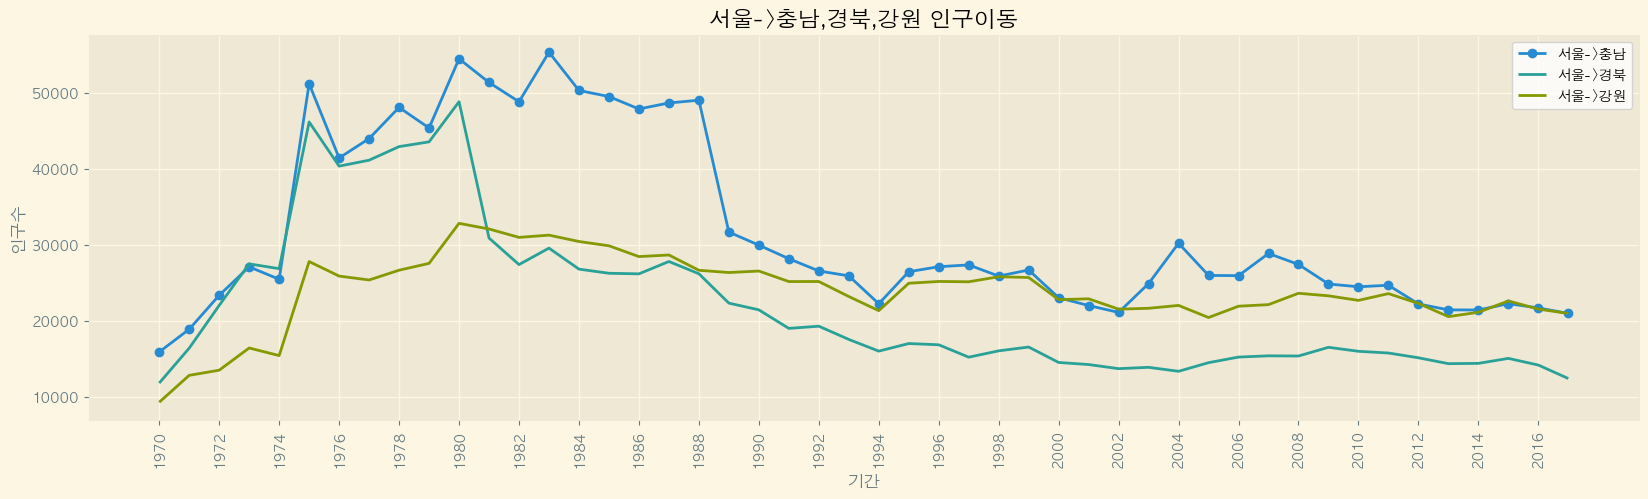

In [12]:
#서울에서 다른지역으로 이동한데이터
mask = (df['전출지별'] == '서울특별시') & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1, inplace=False)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]
# df_3


fig = plt.figure(figsize=(20,5))
ax  = fig.add_subplot(1,1,1)
ax.plot(col_years, df_3.loc['충청남도'],label='서울->충남',marker='o')
ax.plot(col_years, df_3.loc['경상북도'],label='서울->경북')
ax.plot(col_years, df_3.loc['강원도'], label='서울->강원')
ax.legend(loc='best', facecolor='white')
ax.set_title("서울->충남,경북,강원 인구이동")
ax.set_xticklabels([col_years[i] for i in range(0,len(col_years),2)],rotation=90)
ax.set_xticks(range(0,len(col_years), 2))
ax.set_xlabel('기간', size=12)
ax.set_ylabel('인구수', size=12)
plt.show()